# Credit Card fraudulent_Trans Detection Using ML

## Importing Main Libraries

In [3]:
## Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Preprocessing
from sklearn.model_selection import train_test_split,cross_val_predict,cross_val_score

## Model
from sklearn.linear_model import LogisticRegression

## Metrics
from sklearn.metrics import accuracy_score,precision_score,recall_score,roc_auc_score,roc_curve,f1_score
from sklearn.metrics import  confusion_matrix, classification_report

In [4]:
## Loading The DataSet
df=pd.read_csv('creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0


In [5]:
# dataset informations
df.shape

(170463, 31)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170463 entries, 0 to 170462
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    170463 non-null  float64
 1   V1      170463 non-null  float64
 2   V2      170463 non-null  float64
 3   V3      170463 non-null  float64
 4   V4      170463 non-null  float64
 5   V5      170463 non-null  float64
 6   V6      170463 non-null  float64
 7   V7      170463 non-null  float64
 8   V8      170463 non-null  float64
 9   V9      170463 non-null  float64
 10  V10     170463 non-null  float64
 11  V11     170463 non-null  float64
 12  V12     170463 non-null  float64
 13  V13     170463 non-null  float64
 14  V14     170463 non-null  float64
 15  V15     170463 non-null  float64
 16  V16     170463 non-null  float64
 17  V17     170463 non-null  float64
 18  V18     170462 non-null  float64
 19  V19     170462 non-null  float64
 20  V20     170462 non-null  float64
 21  V21     17

In [7]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,170463.000000,170463.000000,170463.000000,170463.000000,170463.000000,170463.000000,170463.000000,170463.000000,170463.000000,170463.000000,...,170462.000000,170462.000000,170462.000000,170462.000000,170462.000000,170462.000000,170462.000000,170462.000000,170462.000000,170462.000000
mean,60945.692185,-0.171418,0.041438,0.496009,0.118163,-0.177346,0.058682,-0.081195,0.032564,0.019095,...,-0.028654,-0.084279,-0.022592,0.009210,0.092750,0.012698,0.002063,0.002476,87.323837,0.002112
std,27706.565970,1.850499,1.611466,1.382129,1.371813,1.338482,1.295161,1.208874,1.228228,1.152669,...,0.743809,0.667001,0.584789,0.598609,0.465168,0.490741,0.392259,0.307549,246.031624,0.045907
min,0.000000,-56.407510,-72.715728,-33.680984,-5.519697,-42.147898,-26.160506,-43.557242,-73.216718,-13.434066,...,-34.830382,-10.933144,-44.807735,-2.836627,-10.295397,-2.604551,-22.565679,-11.710896,0.000000,0.000000
25%,41172.500000,-0.987177,-0.538322,-0.061200,-0.742708,-0.829775,-0.690531,-0.586555,-0.162257,-0.660021,...,-0.230739,-0.546821,-0.170281,-0.332191,-0.195154,-0.330339,-0.065088,-0.026686,5.470000,0.000000
50%,60665.000000,-0.185295,0.110233,0.625232,0.124920,-0.227397,-0.202146,-0.032314,0.056915,-0.079157,...,-0.054634,-0.067189,-0.036388,0.059690,0.136222,-0.059032,0.008744,0.021198,21.860000,0.000000
75%,78493.000000,1.183845,0.804500,1.298406,0.938294,0.372807,0.449766,0.462061,0.351272,0.641997,...,0.127892,0.362294,0.098484,0.415848,0.399693,0.273055,0.089745,0.078337,76.677500,0.000000
max,120194.000000,2.439207,22.057729,9.382558,16.875344,34.801666,22.529298,36.677268,20.007208,15.594995,...,27.202839,10.503090,19.002942,4.022866,7.519589,3.517346,12.152401,33.847808,19656.530000,1.000000


In [8]:
#checking the number of missing values in each column
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       1
V19       1
V20       1
V21       1
V22       1
V23       1
V24       1
V25       1
V26       1
V27       1
V28       1
Amount    1
Class     1
dtype: int64

In [9]:
# distribution of Legal_Transimate(0) transactions & fraudulent_Transulent(1) transactions
df['Class'].value_counts()

Class
0.0    170102
1.0       360
Name: count, dtype: int64

In [10]:
Legal_Trans = df[df['Class']==0]
fraudulent_Trans = df[df['Class']==1]

In [11]:
Legal_Trans.shape

(170102, 31)

In [12]:
Legal_Trans.info()

<class 'pandas.core.frame.DataFrame'>
Index: 170102 entries, 0 to 170461
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    170102 non-null  float64
 1   V1      170102 non-null  float64
 2   V2      170102 non-null  float64
 3   V3      170102 non-null  float64
 4   V4      170102 non-null  float64
 5   V5      170102 non-null  float64
 6   V6      170102 non-null  float64
 7   V7      170102 non-null  float64
 8   V8      170102 non-null  float64
 9   V9      170102 non-null  float64
 10  V10     170102 non-null  float64
 11  V11     170102 non-null  float64
 12  V12     170102 non-null  float64
 13  V13     170102 non-null  float64
 14  V14     170102 non-null  float64
 15  V15     170102 non-null  float64
 16  V16     170102 non-null  float64
 17  V17     170102 non-null  float64
 18  V18     170102 non-null  float64
 19  V19     170102 non-null  float64
 20  V20     170102 non-null  float64
 21  V21     170102 

In [13]:
Legal_Trans.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,170102.000000,170102.000000,170102.000000,170102.000000,170102.000000,170102.000000,170102.000000,170102.000000,170102.000000,170102.000000,...,170102.000000,170102.000000,170102.000000,170102.000000,170102.000000,170102.000000,170102.000000,170102.000000,170102.000000,170102.0
mean,60954.436285,-0.159027,0.032193,0.513948,0.108071,-0.168484,0.061850,-0.066521,0.031054,0.025195,...,-0.030393,-0.084402,-0.022560,0.009386,0.092777,0.012642,0.001681,0.002371,87.272509,0.0
std,27700.464110,1.800808,1.586934,1.275396,1.348610,1.299898,1.291401,1.110218,1.174940,1.139335,...,0.714809,0.663248,0.579742,0.598814,0.464025,0.490827,0.386213,0.306669,246.067820,0.0
min,0.000000,-56.407510,-72.715728,-33.680984,-5.519697,-42.147898,-26.160506,-31.764946,-73.216718,-6.290730,...,-34.830382,-10.933144,-44.807735,-2.836627,-10.295397,-2.604551,-22.565679,-11.710896,0.000000,0.0
25%,41184.250000,-0.983325,-0.539803,-0.055639,-0.744883,-0.826722,-0.688739,-0.583796,-0.162266,-0.656750,...,-0.230786,-0.546778,-0.170051,-0.332048,-0.195006,-0.330422,-0.065101,-0.026540,5.490000,0.0
50%,60679.500000,-0.180525,0.108242,0.627623,0.121950,-0.226052,-0.201107,-0.031108,0.056618,-0.077653,...,-0.055003,-0.067422,-0.036307,0.059760,0.136232,-0.059108,0.008634,0.021165,21.890000,0.0
75%,78488.000000,1.184327,0.799852,1.299770,0.932687,0.373315,0.450665,0.462847,0.349979,0.644227,...,0.126834,0.361878,0.098302,0.415964,0.399578,0.272779,0.089291,0.078028,76.500000,0.0
max,120194.000000,2.439207,18.902453,9.382558,16.875344,34.801666,22.529298,36.677268,18.709255,15.594995,...,22.614889,10.503090,19.002942,4.022866,7.519589,3.517346,12.152401,33.847808,19656.530000,0.0


In [14]:
fraudulent_Trans.shape

(360, 31)

In [15]:
fraud_percent =len(fraudulent_Trans)/float(len(df))
fraud_percent

0.0021118952499956

In [16]:
print(f"Percentage of Fraud Tnx in datasets : {fraud_percent*100:.2f}%")

Percentage of Fraud Tnx in datasets : 0.21%


In [17]:
fraudulent_Trans.info()

<class 'pandas.core.frame.DataFrame'>
Index: 360 entries, 541 to 167305
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    360 non-null    float64
 1   V1      360 non-null    float64
 2   V2      360 non-null    float64
 3   V3      360 non-null    float64
 4   V4      360 non-null    float64
 5   V5      360 non-null    float64
 6   V6      360 non-null    float64
 7   V7      360 non-null    float64
 8   V8      360 non-null    float64
 9   V9      360 non-null    float64
 10  V10     360 non-null    float64
 11  V11     360 non-null    float64
 12  V12     360 non-null    float64
 13  V13     360 non-null    float64
 14  V14     360 non-null    float64
 15  V15     360 non-null    float64
 16  V16     360 non-null    float64
 17  V17     360 non-null    float64
 18  V18     360 non-null    float64
 19  V19     360 non-null    float64
 20  V20     360 non-null    float64
 21  V21     360 non-null    float64
 22  V2

In [18]:
fraudulent_Trans.Amount.describe()

count     360.000000
mean      111.576722
std       227.309252
min         0.000000
25%         1.000000
50%        11.385000
75%       104.007500
max      1809.680000
Name: Amount, dtype: float64

## Handling imbalanced Dataset

## Resampling Technique

Oversampling the Minority Class: Increases the instances of the minority class.
Techniques include:
Random Oversampling: Duplicates samples from the minority class randomly.
SMOTE (Synthetic Minority Over-sampling Technique): Generates synthetic samples for the minority class by interpolating between nearby instances.SMOTE looks into minority class instances and use k-neighbor to select 
a random nearest neighbor ,and a synthetic instance is created randomly in feature space.

Undersampling the Majority Class: Reduces instances in the majority class.
Techniques include:
Random Undersampling: Randomly removes samples from the majority class.
Cluster-Based Undersampling: Uses clustering (like k-means) to identify and retain representative samples from the majority class.

### Under sampling

In [23]:
##Now taking only the no. of Legal_Transimate records which matches with our fraudulent_Trans records(under sample) to make it balanced dataset
## This Making The volume Of Two Classes are Equal and Balance The Data
legal_sample=Legal_Trans.sample(n=492)


In [24]:
New_df=pd.concat([legal_sample,fraudulent_Trans],axis=0)
New_df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
54363,46413.0,-1.077384,-1.128529,2.393060,-0.456087,-1.847628,0.531568,0.958805,-0.530225,-0.289653,...,-0.088316,0.309646,-0.165874,0.442057,0.170422,-0.165868,-0.116570,-0.492978,368.70,0.0
10147,15522.0,-0.783984,1.569242,1.412252,1.152618,-0.191701,-0.545313,0.271662,0.302608,0.421591,...,0.108174,0.685316,-0.061997,0.580092,-0.192294,-0.306759,0.280471,0.146150,5.90,0.0
121076,76062.0,-0.433042,0.903581,1.659245,0.064816,-0.424111,-1.139602,0.557487,0.038157,-0.083597,...,-0.233122,-0.714673,0.039950,0.632340,-0.313105,0.058412,0.252072,0.119397,0.89,0.0
159616,112724.0,1.874604,2.393060,-4.375443,4.732008,2.481984,-1.908574,1.177723,-0.294804,-2.038520,...,-0.294569,-0.843925,-0.068062,-0.643631,0.225704,0.054471,0.009047,0.102908,6.06,0.0
111607,72294.0,-1.802857,0.862908,1.413713,-0.375978,-0.412126,0.300580,0.369527,0.291429,1.061870,...,-0.205240,0.334731,-0.141434,0.292544,0.160289,0.325066,0.041615,-0.201658,53.85,0.0


In [25]:
New_df.shape

(852, 31)

In [26]:
## Checking The Sampling
New_df['Class'].value_counts()

Class
0.0    492
1.0    360
Name: count, dtype: int64

## Splitiing dataset

In [29]:
X=New_df.drop('Class',axis=1)
y=New_df['Class']

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42,stratify=y) 
#stratify =y means same no. of values in X_train and y_train and in X_test & y_test

In [31]:
print(X_train.shape,y_train.shape,X_test.shape,y_test.shape)

(681, 30) (681,) (171, 30) (171,)


Also we can split the train and test data by  Standardization(StandardScaler()) on Amount column and then use the scaled dataset

## Building Model

Hyperparameter C in Logistic Regression :
In Logistic Regression, the hyperparameter C controls the regularization strength. It is the inverse of the regularization parameter λ (lambda).

C is a hyperparameter controlling regularization in Logistic Regression.

A large C weakens regularization (risk of overfitting), while a small C strengthens it (risk of underfitting).

C = 0.1 or C = 0.01 means stronger regularization.

C = 100 or C = 10 means weaker regularization.

### Define Hyperparameters for Grid Search

In [47]:
# Define a range of hyperparameter values for 'C' to test

params = {'C': [0.01, 0.1, 1, 10, 100]}

#Tuning C can improve performance metrics like accuracy, precision, recall, or F1-score, depending on the evaluation goals.

In [48]:
# Initialize and train the Logistic Regression model
logreg = LogisticRegression(max_iter=100000)  # max_iter increased for convergence

### Perform Grid Search for Hyperparameter(C) Tuning
We will use GridSearchCV to test all possible values of 'C' and find the best one based on cross-validation performance.

In [51]:
from sklearn.model_selection import GridSearchCV
log_reg= GridSearchCV(estimator=logreg ,param_grid=params ,scoring='accuracy' ,cv=5)  #performance metric we take accuracy_Score

Choosing cv=5 for cross-validation is a practical choice that balances the trade-offs between having enough folds to provide a reliable estimate of model performance and not overburdening the computational resources. It is widely used and generally provides a good compromise between bias, variance, and computational efficiency.

In [56]:
# Fit/train the model to the training data
log_reg.fit(X_train,y_train)

C:\Users\subham.mehta\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of f AND g EVALUATIONS EXCEEDS LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\subham.mehta\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of f AND g EVALUATIONS EXCEEDS LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/st

GridSearchCV(cv=5, estimator=LogisticRegression(max_iter=100000),
             param_grid={'C': [0.01, 0.1, 1, 10, 100]}, scoring='accuracy')

In [57]:
log_reg.best_params_

{'C': 0.1}

In [58]:
log_reg.best_score_
#Example: If log_reg.best_score_ = 0.85, it means the model achieved 85% accuracy during cross-validation.

0.9559252898239589

In [59]:
'''
Why tune C?
Improves Generalization: Proper tuning of C helps the model generalize better to unseen data by finding the right balance between fitting the training data and regularization.
Optimizes Performance: Tuning C can improve performance metrics like accuracy, precision, recall, or F1-score, depending on the evaluation goals.

Summary:
We didn't tune C in the initial demonstration for simplicity. In practice, hyperparameter tuning using methods like GridSearchCV is essential for optimizing model performance.
'''

"\nWhy tune C?\nImproves Generalization: Proper tuning of C helps the model generalize better to unseen data by finding the right balance between fitting the training data and regularization.\nOptimizes Performance: Tuning C can improve performance metrics like accuracy, precision, recall, or F1-score, depending on the evaluation goals.\n\nSummary:\nWe didn't tune C in the initial demonstration for simplicity. In practice, hyperparameter tuning using methods like GridSearchCV is essential for optimizing model performance.\n"

### Prediction on test data

In [61]:
#Make predictions on the test set
y_pred=log_reg.predict(X_test)

### Evaluate the model using performance metrics i.e. accuracy, confusion matrix, and classification report 

In [63]:
### Evaluate the model using accuracy, confusion matrix, and classification report

## accuracy& precision & Recall & ROC_AUC
accuracy = accuracy_score(y_test, y_pred)
precision_test= precision_score(y_test,y_pred)
recall_test= recall_score(y_test,y_pred)
roc_auc_test= roc_auc_score(y_test,y_pred)
f1_test =f1_score(y_test,y_pred)
print(f'Accuracy on Test Data : {accuracy:0.2f}')
print(f'Precision on Test Data : {precision_test:0.2f}')
print(f'Recall on Test Data : {recall_test:0.2f}')
print(f'ROC_AUC on Test Data : {roc_auc_test:0.2f}')


conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print("\nConfusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)

Accuracy on Test Data : 0.95
Precision on Test Data : 0.97
Recall on Test Data : 0.90
ROC_AUC on Test Data : 0.94

Confusion Matrix:
[[97  2]
 [ 7 65]]

Classification Report:
              precision    recall  f1-score   support

         0.0       0.93      0.98      0.96        99
         1.0       0.97      0.90      0.94        72

    accuracy                           0.95       171
   macro avg       0.95      0.94      0.95       171
weighted avg       0.95      0.95      0.95       171



So the Max Accuracy  of F1-score is 94% and macro avg is 93% without StandardScaled datasets

In [65]:
### Visualize the confusion matrix using heatmap

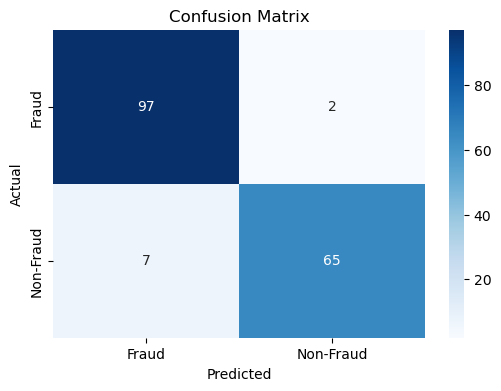

In [66]:

plt.figure(figsize=(6,4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Fraud', 'Non-Fraud'], yticklabels=['Fraud', 'Non-Fraud'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()